# Installation and Visualization


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

obesity=pd.read_csv("data_obesity.csv")

print(obesity)

      Gender        Age  ...                 MTRANS           NObeyesdad
0     Female  21.000000  ...  Public_Transportation        Normal_Weight
1     Female  21.000000  ...  Public_Transportation        Normal_Weight
2       Male  23.000000  ...  Public_Transportation        Normal_Weight
3       Male  27.000000  ...                Walking   Overweight_Level_I
4       Male  22.000000  ...  Public_Transportation  Overweight_Level_II
...      ...        ...  ...                    ...                  ...
2106  Female  20.976842  ...  Public_Transportation     Obesity_Type_III
2107  Female  21.982942  ...  Public_Transportation     Obesity_Type_III
2108  Female  22.524036  ...  Public_Transportation     Obesity_Type_III
2109  Female  24.361936  ...  Public_Transportation     Obesity_Type_III
2110  Female  23.664709  ...  Public_Transportation     Obesity_Type_III

[2111 rows x 17 columns]


In [26]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

The info() function allows us to visualize the characteristics of the dataset, so we can see that there are no missing values and so we don't have to clean the dataset.

In [27]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Thanks to describe(), we can see the statistics related to the different numerical variables. For example, we can see that the study was carried out on relatively young people because the average age is 24.3 years.

In [28]:
IMC=[]
for i in range (len(obesity["Height"])):
  imc=obesity["Weight"][i]/(obesity["Height"][i])**2
  IMC.append(imc)

obesity["IMC"]=IMC

The BMI (body mass index) is important because it is a data that allows to define the obesity or not of a person based on his height and weight.

We have therefore added this data in the last column of our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

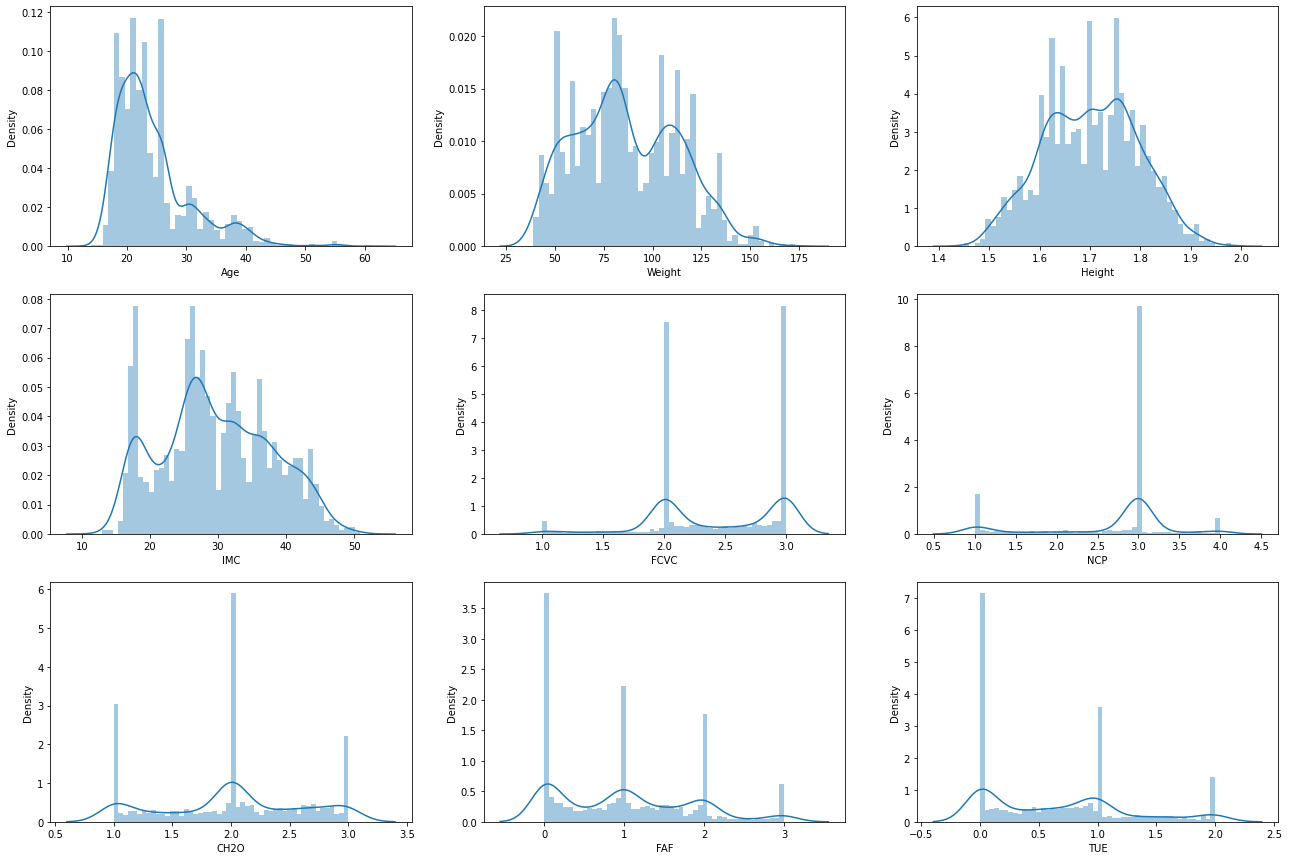

In [29]:
obe_numeric=obesity.select_dtypes(include='number')


fig,axs=plt.subplots(3,3)
fig.set_size_inches(22,15)

sns.distplot(obe_numeric['Age'],bins=50,kde=True,ax=axs[0,0])
sns.distplot(obe_numeric['Weight'],bins=50,kde=True,ax=axs[0,1])
sns.distplot(obe_numeric['Height'],bins=50,kde=True,ax=axs[0,2])
sns.distplot(obe_numeric['IMC'],bins=50,kde=True,ax=axs[1,0])
sns.distplot(obe_numeric['FCVC'],bins=50,kde=True,ax=axs[1,1])
sns.distplot(obe_numeric['NCP'],bins=50,kde=True,ax=axs[1,2])
sns.distplot(obe_numeric['CH2O'],bins=50,kde=True,ax=axs[2,0])
sns.distplot(obe_numeric['FAF'],bins=50,kde=True,ax=axs[2,1])
sns.distplot(obe_numeric['TUE'],bins=50,kde=True,ax=axs[2,2])


plt.show()


Using these data representations, we can tell several things.
First, the variables "Age", "Weight", "Height" and "BMI" are relatively well distributed over a wide range of values.

However, we can see that the variable "NCP" which represents the number of meals per day is not very significant because the vast majority of people eat 3 meals. This variable will therefore be almost useless to create links with obesity cases.


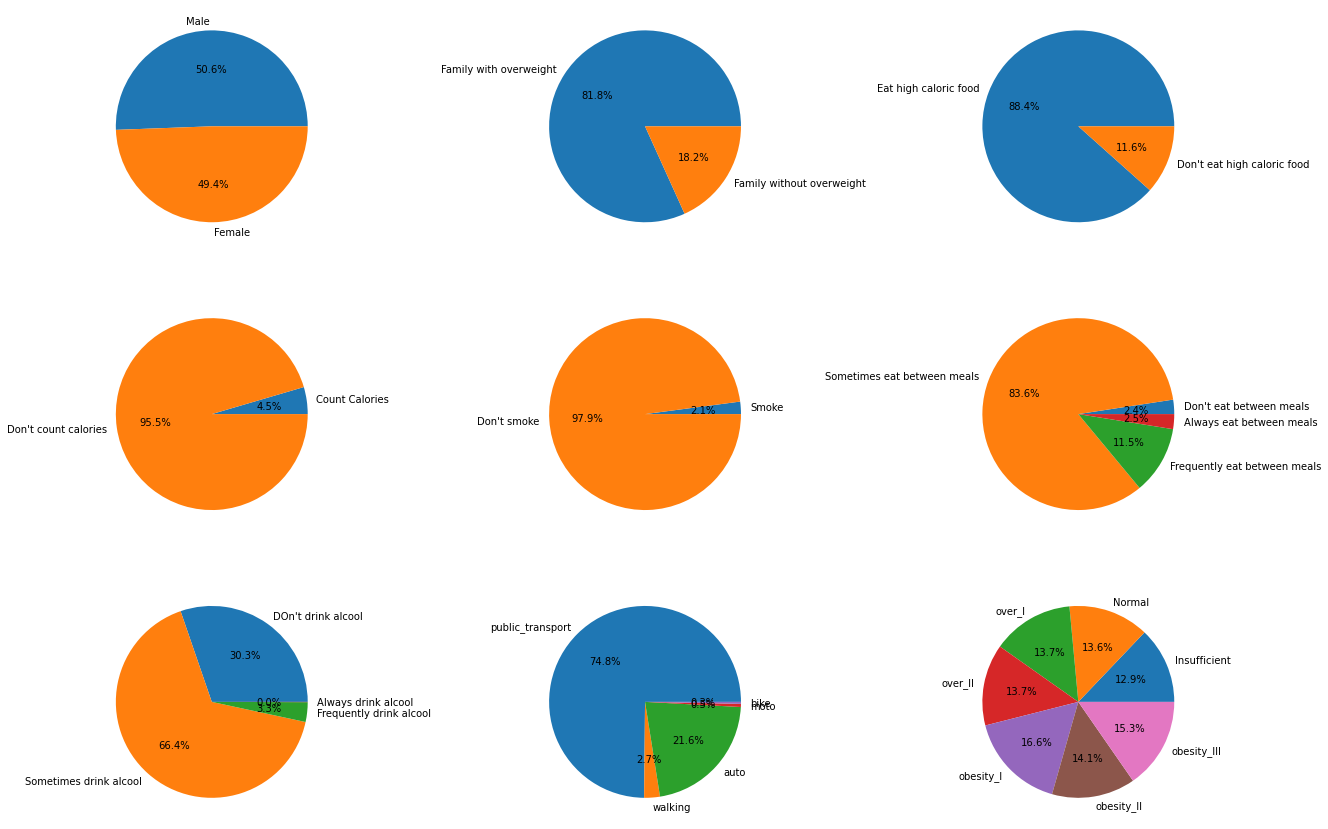

In [30]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(22,15)

Male=obesity[obesity['Gender']=='Male']
Female=obesity[obesity['Gender']=='Female']
labels=['Male','Female']
gender = [Male,Female]
nb_gender = [len(x.index) for x in gender]
axs[0, 0].pie(nb_gender, labels=labels, autopct='%1.1f%%')

Yes=obesity[obesity['family_history_with_overweight']=='yes']
No=obesity[obesity['family_history_with_overweight']=='no']
labels= ['Family with overweight','Family without overweight']
Family = [Yes,No]
nb_Family = [len(x.index) for x in Family]
axs[0, 1].pie(nb_Family, labels=labels, autopct='%1.1f%%')

Yes =obesity[obesity['FAVC']=='yes']
No =obesity[obesity['FAVC']=='no']
labels = ['Eat high caloric food',"Don't eat high caloric food"]
Caloric = [Yes, No]
nb_Caloric = [len(x.index) for x in Caloric]
axs[0, 2].pie(nb_Caloric, labels=labels, autopct='%1.1f%%')

No=obesity[obesity['CAEC']=='no']
Sometimes=obesity[obesity['CAEC']=='Sometimes']
Frequently=obesity[obesity['CAEC']=='Frequently']
Always=obesity[obesity['CAEC']=='Always']
labels = ["Don't eat between meals", 'Sometimes eat between meals', 'Frequently eat between meals', 'Always eat between meals']
Meals = [No, Sometimes, Frequently, Always]
nb_Meals = [len(x.index) for x in Meals]
axs[1, 2].pie(nb_Meals, labels=labels, autopct='%1.1f%%')

No=obesity[obesity['SMOKE']=='no']
Yes=obesity[obesity['SMOKE']=='yes']
labels = ['Smoke', "Don't smoke"]
Smoke = [Yes, No]
nb_Smoke = [len(x.index) for x in Smoke]
axs[1, 1].pie(nb_Smoke, labels=labels, autopct='%1.1f%%')


Yes =obesity[obesity['SCC']=='yes']
No =obesity[obesity['SCC']=='no']
labels= ['Count Calories',"Don't count calories"]
Count = [Yes, No]
nb_Count = [len(x.index) for x in Count]
axs[1, 0].pie(nb_Count, labels=labels, autopct='%1.1f%%')


No=obesity[obesity['CALC']=='no']
Sometimes=obesity[obesity['CALC']=='Sometimes']
Frequently=obesity[obesity['CALC']=='Frequently']
Always=obesity[obesity['CALC']=='Always']
labels = ["DOn't drink alcool", 'Sometimes drink alcool', 'Frequently drink alcool', 'Always drink alcool']
Alcool = [No, Sometimes, Frequently, Always]
nb_Alcool = [len(x.index) for x in Alcool]
axs[2, 0].pie(nb_Alcool, labels=labels, autopct='%1.1f%%')

Public=obesity[obesity['MTRANS']=='Public_Transportation']
Walking=obesity[obesity['MTRANS']=='Walking']
Auto=obesity[obesity['MTRANS']=='Automobile']
Moto=obesity[obesity['MTRANS']=='Motorbike']
Bike=obesity[obesity['MTRANS']=='Bike']
labels=['public_transport','walking','auto','moto','bike']
Transport=[Public,Walking,Auto,Moto,Bike]
nb_transport=[len(x.index) for x in Transport]
axs[2,1].pie(nb_transport,labels=labels,autopct='%1.1f%%')

Insufficient=obesity[obesity['NObeyesdad']=='Insufficient_Weight']
Normal=obesity[obesity['NObeyesdad']=='Normal_Weight']
Over_I=obesity[obesity['NObeyesdad']=='Overweight_Level_I']
Over_II=obesity[obesity['NObeyesdad']=='Overweight_Level_II']
Obes_I=obesity[obesity['NObeyesdad']=='Obesity_Type_I']
Obes_II=obesity[obesity['NObeyesdad']=='Obesity_Type_II']
Obes_III=obesity[obesity['NObeyesdad']=='Obesity_Type_III']
labels=['Insufficient','Normal','over_I','over_II','obesity_I','obesity_II','obesity_III']
shape=[Insufficient,Normal,Over_I,Over_II,Obes_I,Obes_II,Obes_III]
nb_shape=[len(x.index) for x in shape]
axs[2,2].pie(nb_shape,labels=labels,autopct='%1.1f%%')

plt.show()


As seen previously, some variables are not very useful because they are not well represented. Indeed, this is the case for smokers, there are too few smokers compared to non-smokers for this variable to be meaningful. The same is true for those who count or not their calories.

What is interesting is that the "NObeyesdad" variable is relatively well distributed, each body type is represented with approximately the same proportionality. This distribution suggests that smoking or counting calories does not directly influence obesity.

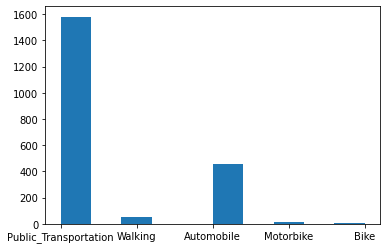

In [31]:
plt.hist(obesity["MTRANS"])
plt.show()

Here is another way to view the variables in our dataset.

# Visualizing dependencies between variables

We are going to link different variables to see if some influence others.

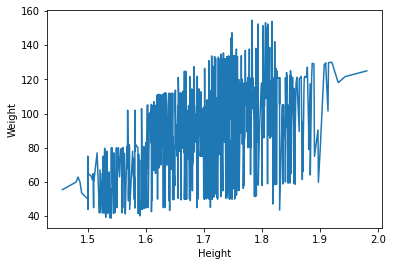

In [32]:
index=[x for x in range(obesity.shape[0]) if x%2==0]
index
rows_dropped_obe=obesity.drop(obesity.index[index])

rows_dropped_obe=rows_dropped_obe.sort_values("Height")
plt.plot(rows_dropped_obe["Height"],rows_dropped_obe["Weight"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

For this plot, I removed half of the data randomly so that it is a little more readable.
We deduce that there is a link between height and weight (which is coherent). The tendency is increasing, i.e. the bigger you are, the heavier you are. However, the graph is difficult to use because many data do not follow the global trend. These data correspond to people whose weight is not "normal".

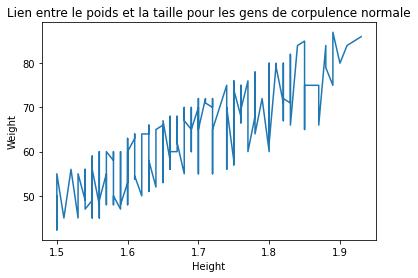

In [33]:
index=[x for x in range(obesity.shape[0]) if obesity["NObeyesdad"][x]!="Normal_Weight"]
index
rows_dropped_obe=obesity.drop(obesity.index[index])

rows_dropped_obe=rows_dropped_obe.sort_values("Height")
plt.plot(rows_dropped_obe["Height"],rows_dropped_obe["Weight"])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Lien entre le poids et la taille pour les gens de corpulence normale")
plt.show()

Here is the plot if we take only the weight and the height of the people who have a value "Normal_Weight" for the variable "NObeyesdad". We can see that there are much less weird values and we can see a much more homogeneous curve.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


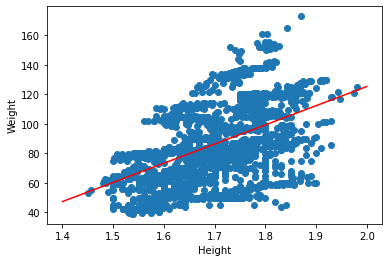

In [34]:
x = np.array(obesity['Height'])
y = np.array(obesity['Weight'])


x = x.reshape(-1,1)
y = y.reshape(-1,1)

reg = LinearRegression(normalize=True)
reg.fit(x,y)

a = reg.coef_[0]
b = reg.intercept_

ordonne = np.linspace(1.4,2,100)

plt.scatter(x,y)
plt.plot(ordonne,a*ordonne+b,color='r')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

After linear regression with the module sklearn.linear_model, we can see the link between these two variables.

In [35]:
liste1=[]
liste2=[]
liste3=[]

for i in range(len(obesity["FCVC"])):
  if (obesity["FCVC"][i]==1):
    liste1.append(IMC[i])
  elif (obesity["FCVC"][i]==2):
    liste2.append(IMC[i])
  else:
    liste3.append(IMC[i])

print("La moyenne d'IMC des gens mangeant des légumes 1 fois par jour est",statistics.mean(liste1))
print("La moyenne d'IMC des gens mangeant des légumes 1 fois tous les 2 jours est",statistics.mean(liste2))
print("La moyenne d'IMC des gens mangeant des légumes 1 fois tous les 3 jours est",statistics.mean(liste3))


La moyenne d'IMC des gens mangeant des légumes 1 fois par jour est 23.61765536639728
La moyenne d'IMC des gens mangeant des légumes 1 fois tous les 2 jours est 26.83102305656046
La moyenne d'IMC des gens mangeant des légumes 1 fois tous les 3 jours est 31.00070278769006


La moyenne d'IMC des gens faisaint du sport 0 fois par semaine 30.120151201560727
La moyenne d'IMC des gens faisaint du sport 1 fois par semaine 25.80191774727365
La moyenne d'IMC des gens faisaint du sport 2 fois par semaine 22.516165760132022
La moyenne d'IMC des gens faisaint du sport 3 fois par semaine 24.433015802050246


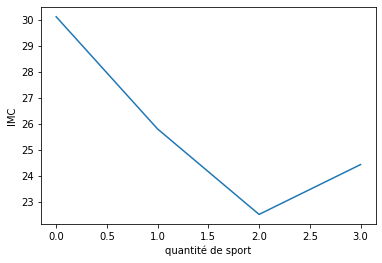

In [36]:
liste0=[]
liste1=[]
liste2=[]
liste3=[]

for i in range(len(obesity["FAF"])):
  if (obesity["FAF"][i]==0):
    liste0.append(IMC[i])

  if (obesity["FAF"][i]==1):
    liste1.append(IMC[i])

  if (obesity["FAF"][i]==2):
    liste2.append(IMC[i])
    
  if (obesity["FAF"][i]==3):
    liste3.append(IMC[i])

print("La moyenne d'IMC des gens faisaint du sport 0 fois par semaine",statistics.mean(liste0))
print("La moyenne d'IMC des gens faisaint du sport 1 fois par semaine",statistics.mean(liste1))
print("La moyenne d'IMC des gens faisaint du sport 2 fois par semaine",statistics.mean(liste2))
print("La moyenne d'IMC des gens faisaint du sport 3 fois par semaine",statistics.mean(liste3))

x=[0,1,2,3]
mean_FCVC=[statistics.mean(liste0),statistics.mean(liste1),statistics.mean(liste2),statistics.mean(liste3)]

plt.plot(x,mean_FCVC)
plt.xlabel("quantité de sport")
plt.ylabel("IMC")
plt.show()

In [37]:
liste_yes=[]
liste_no=[]

for i in range(len(obesity["family_history_with_overweight"])):
  if (obesity["family_history_with_overweight"][i]=="yes"):
    liste_yes.append(IMC[i])
  else:
    liste_no.append(IMC[i])

print("La moyenne d'IMC des gens ayant des antécédents familiaux est de",statistics.mean(liste_yes))
print("La moyenne d'IMC des gens n'ayant pas d'antécédent est de",statistics.mean(liste_no))

La moyenne d'IMC des gens ayant des antécédents familiaux est de 31.529168764517884
La moyenne d'IMC des gens n'ayant pas d'antécédent est de 21.500493230325795


In [38]:
liste0=[]
liste1=[]
liste2=[]
liste3=[]

for i in range(len(obesity["CALC"])):
  if (obesity["CALC"][i]=="no"):
    liste0.append(IMC[i])

  if (obesity["CALC"][i]=="Sometimes"):
    liste1.append(IMC[i])

  if (obesity["CALC"][i]=="Frequently"):
    liste2.append(IMC[i])
    
  if (obesity["CALC"][i]=="Always"):
    liste3.append(IMC[i])

print("La moyenne d'IMC des gens qui ne boivent pas d'alcool ",statistics.mean(liste0))
print("La moyenne d'IMC des gens qui boivent parfois de l'alcool ",statistics.mean(liste1))
print("La moyenne d'IMC des gens qui boivent souvent de l'alcool ",statistics.mean(liste2))
print("La moyenne d'IMC des gens qui boivent toujours de l'alcool",statistics.mean(liste3))

La moyenne d'IMC des gens qui ne boivent pas d'alcool  27.06413630236094
La moyenne d'IMC des gens qui boivent parfois de l'alcool  31.043454797885495
La moyenne d'IMC des gens qui boivent souvent de l'alcool  26.981150895801562
La moyenne d'IMC des gens qui boivent toujours de l'alcool 22.49134948096886


With these last three calculations, I wanted to check the influence of eating vegetables, doing sports and having a family history on BMI.

In the first study, the results are obvious and show the influence of vegetables on body size. A person who eats vegetables regularly will have a BMI around 23.6 compared to 31 (obesity) for someone who rarely eats them.

In the study on sports, the graph shows that the more one practices sports, the more one's BMI decreases and therefore the risk of obesity decreases. However, we notice an increase in BMI when we practice a lot of sport, this is probably due to the increase in muscle mass and not to fat mass.

Finally, we notice that a family history of obesity favors obesity in people. Either it is simply a question of family culture with tendencies to eat a diet that is not fat or it could be a genetic criterion in which case people are born with a greater chance of becoming obese.

# Prediction of data with several methods

In [39]:
obe= obesity.drop(columns=['Height', 'Weight','IMC'])
print(obe.shape)

(2111, 15)


In [40]:
obe[obe.isnull().any(axis=1)]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [41]:
columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    obe[col] = obe[col].astype('category')

In [42]:
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:    
        print("Variable:", col, "| Count Unique:",obe[col].nunique(),"| Min: ", obe[col].min(), "| Max: ",obe[col].max())

columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    obe[col] = round(obe[col]).astype('int')  
    
# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [43]:
obe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   family_history_with_overweight  2111 non-null   category
 3   FAVC                            2111 non-null   category
 4   FCVC                            2111 non-null   int64   
 5   NCP                             2111 non-null   int64   
 6   CAEC                            2111 non-null   category
 7   SMOKE                           2111 non-null   category
 8   CH2O                            2111 non-null   int64   
 9   SCC                             2111 non-null   category
 10  FAF                             2111 non-null   int64   
 11  TUE                             2111 non-null   int64   
 12  CALC                

In [44]:
obe_prep = obe.copy()

obe_prep = pd.get_dummies(obe_prep,columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
obe_prep.head()

from sklearn.model_selection import train_test_split
X = obe_prep.drop(columns=["NObeyesdad"])

# Target variable
y = obe_prep['NObeyesdad'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))
            print("Confusion matrix : \n",confusion_matrix(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")  

run_models(X_train, y_train, X_test, y_test)
        




Random Forest:
---------------------------------------------------------------
Accuracy: 0.82177
Accuracy w/Scaled Data (ss): 0.82177
Accuracy w/Scaled Data (mm): 0.82177

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.85      0.87      0.86        92
      Normal_Weight       0.60      0.69      0.64        77
     Obesity_Type_I       0.85      0.80      0.82       114
    Obesity_Type_II       0.90      0.94      0.92        85
   Obesity_Type_III       0.99      0.99      0.99        92
 Overweight_Level_I       0.79      0.71      0.75        89
Overweight_Level_II       0.76      0.74      0.75        85

           accuracy                           0.82       634
          macro avg       0.82      0.82      0.82       634
       weighted avg       0.83      0.82      0.82       634

                            -----------------------------------               

Decision Tree:
------------------------------

In [46]:
from sklearn.model_selection import GridSearchCV

def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion matrix : \n",confusion_matrix(y_test, y_pred))

# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.81
{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.83      0.84      0.83        92
      Normal_Weight       0.76      0.51      0.61        77
     Obesity_Type_I       0.83      0.83      0.83       114
    Obesity_Type_II       0.85      0.94      0.89        85
   Obesity_Type_III       0.91      1.00      0.95        92
 Overweight_Level_I       0.78      0.78      0.78        89
Overweight_Level_II       0.70      0.75      0.73        85

           accuracy                           0.81       634
          macro avg       0.81      0.81      0.80       634
       weighted avg       0.81      0.81      0.81       634

Confusion matrix : 
 [[77  4  3  0  0  3  5]
 [12 39  4  1  4  7 10]
 [ 1  3 95  3  1  5  6]
 [ 0  0  1 80  0  1  3]
 